In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [13]:
fp = "IDN_adm/IDN_adm1.shp"
map_df = gpd.read_file(fp)
# check the GeoDataframe
map_df.head(1)

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,106,IDN,Indonesia,1,Aceh,Propinsi,Autonomous Province,None,Achin|Atjeh|Nanggroe Aceh Darussalam,(POLYGON ((97.38493347167986 1.977126002311707...


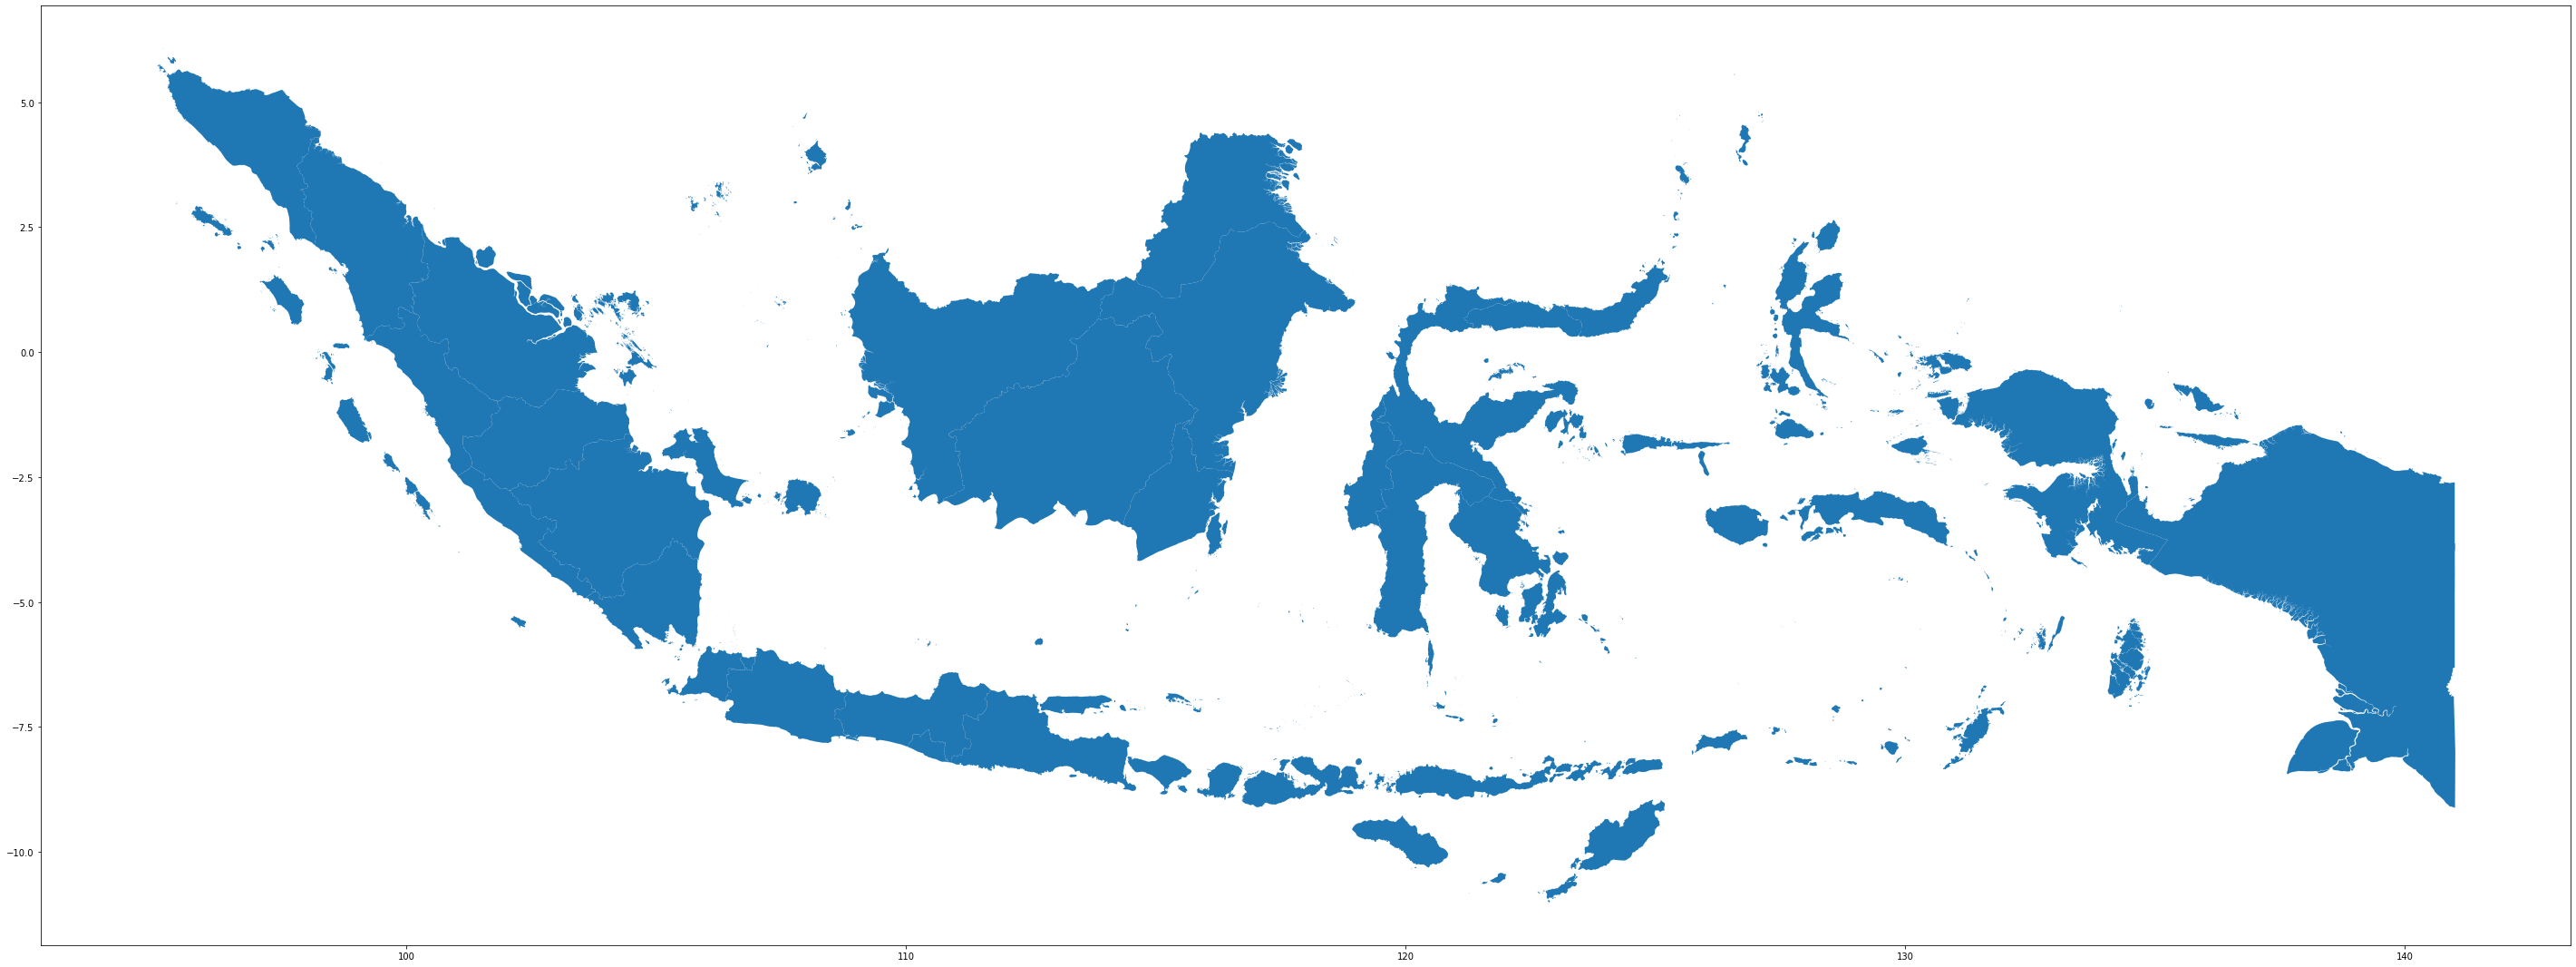

In [14]:
plt.rcParams['figure.figsize'] = [50, 70] #height, width
map_df.plot()

In [18]:
data = pd.read_csv("data.csv", sep=",")
data.head(1)

,Provinsi,Kode,Jumlah_siswa
0,Jawa Barat,1,1486


In [24]:
# join the geodataframe with the csv dataframe
merged = map_df.merge(data, how='left', left_on="NAME_1", right_on="Provinsi")
merged = merged[['Provinsi', 'geometry', 'Jumlah_siswa']]
merged.head(35)

,Provinsi,geometry,Jumlah_siswa
0,Aceh,(POLYGON ((97.38493347167986 1.977126002311707...,13
1,Bali,"(POLYGON ((115.6298828125 -8.77598762512207, 1...",31
2,Bangka-Belitung,"(POLYGON ((108.0695114135744 -3.8030490875243,...",4
3,Banten,(POLYGON ((105.5486068725586 -6.99471807479858...,246
4,Bengkulu,(POLYGON ((102.3862686157229 -5.47111892700195...,15
5,Gorontalo,(POLYGON ((122.1213912963867 0.405833005905151...,10
6,Irian Jaya Barat,(POLYGON ((133.5066833496097 -4.32503890991199...,8
7,Jakarta Raya,(POLYGON ((106.7333831787109 -6.09776020050048...,878
8,Jambi,(POLYGON ((104.216278076172 -1.063259005546456...,30
9,Jawa Barat,(POLYGON ((107.8529739379886 -7.73661088943475...,1486


In [37]:
merged['Provinsi'] = merged['Provinsi'].replace('Irian Jaya Barat', 'Papua Barat')

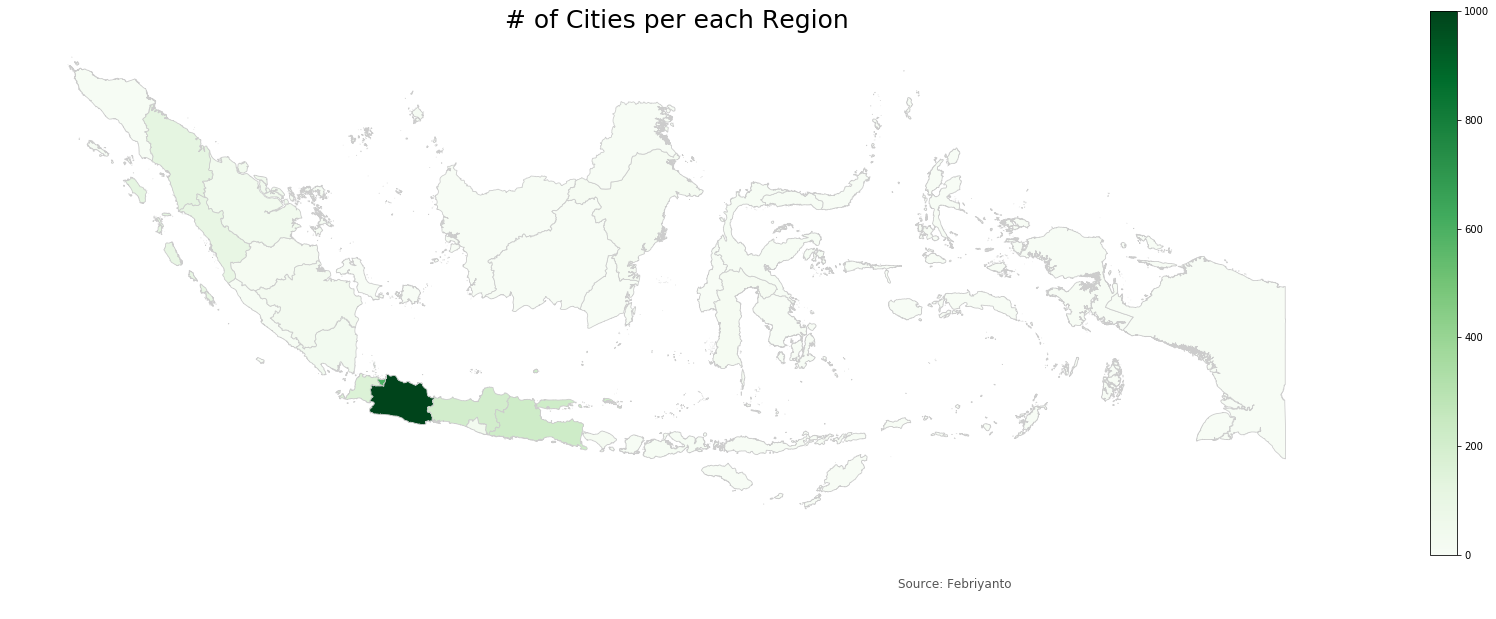

In [43]:
variable = 'Jumlah_siswa'

# set the range for the choropleth values
vmin, vmax = 0, 1000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('# of Cities per each Region', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: Febriyanto', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)
# create map
merged.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8')